# Analysis Of Indian Statrtup Funding Data

<img src="http://jrhassociates.net/wp-content/uploads/2014/09/7.png" title="Source : www.jrhassociates.net">

## Introduction  

India has been very active in creating a healthy startup ecosystem, and the growth in the number of startups is increasing year on year. In fact, it is among the top five startup communities in the world.  
Being so startup friendly the country has attracted numerous numbers of investors, both national and international. Therefore a large amount of money is poured into the startup ecosystem. Also due to government support, technology boon and rise of tier-2 and tier-3 cities has boosted the startup ecosystem.   
Events like launch of Startup India initiative, US elections and the Indian banknote demonetization had a huge impact on the startup community. The dataset acquired via kaggle.com will help to analyze the startup trends from start of 2015 to mid 2017 and how to above events have affected the trend.  

## Scope of the Analysis

The followings are the scope for this report
*	The important investor of the Indian ecosystem.
*	The amount of funds does startup generally gets in India.
*	The roles of cities in funding.
*	Various sectors or industries which are more favored by investors for funding.
*	How funding has changed overtime.
*	How events like US elections and Indian banknote demonetization affected the funding.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import squarify
import os

In [2]:
fund_data = pd.read_csv('/home/tejas/Desktop/ISFDA/startup_funding.csv')

#### Knowning more about the dataset

In [4]:
fund_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


#### Shape and Info 

In [5]:
fund_data.shape

(2372, 10)

In [6]:
fund_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


#### Columns of the table

In [7]:
fund_data.columns 

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

#### Identifiying Null values and percentage of null values

In [8]:
fund_data.isnull().sum().sort_values(ascending =False)

Remarks             1953
SubVertical          936
AmountInUSD          847
CityLocation         179
IndustryVertical     171
InvestorsName          8
InvestmentType         1
StartupName            0
Date                   0
SNo                    0
dtype: int64

Now Percentage

In [9]:
missing = fund_data.isnull().sum().sort_values(ascending=False)
percent = (missing/fund_data.isnull().count())*100
print("Percentage of missing data")
percent

Percentage of missing data


AmountInUSD         35.708263
CityLocation         7.546374
Date                 0.000000
IndustryVertical     7.209106
InvestmentType       0.042159
InvestorsName        0.337268
Remarks             82.335582
SNo                  0.000000
StartupName          0.000000
SubVertical         39.460371
dtype: float64

We can see that Remarks has the highest amount of null values therefore the columns has to be dropped.

In [10]:
fund_data.drop(['Remarks'],axis=1,inplace=True)

#### Fixing Dates and other data

In [11]:
fund_data['Date']=fund_data['Date'].replace({"12/05.2015":"12/05/2015"})
fund_data['Date']=fund_data['Date'].replace({"13/04.2015":"13/04/2015"})
fund_data['Date']=fund_data['Date'].replace({"15/01.2015":"15/01/2015"})
fund_data['Date']=fund_data['Date'].replace({"22/01//2015":"22/01/2015"})
fund_data['StartupName'] = fund_data['StartupName'].replace({"Flipkart.com":"Flipkart"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"ECommerce":"eCommerce"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"ecommerce":"eCommerce"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"Ecommerce":"eCommerce"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"Crowd funding":"Crowd Funding"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"SeedFunding":"Seed Funding"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"PrivateEquity":"Private Equity"})
fund_data['StartupName']=fund_data['StartupName'].replace({"practo":"Practo"})
fund_data['StartupName']=fund_data['StartupName'].replace({"couponmachine.in":"Couponmachine"})
fund_data['StartupName']=fund_data['StartupName'].replace({"Olacabs":"Ola Cabs"})
fund_data['StartupName']=fund_data['StartupName'].replace({"Ola":"Ola Cabs"})

#### Replace in ',' to '' in AmountInUSD

In [12]:
fund_data['AmountInUSD'] = fund_data['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))

### Some indepth insights on the amont of investements

#### Minimum Investments

In [13]:
print("Minimum Investment")
fund_data['AmountInUSD'].min()

Minimum Investment


16000.0

Details of the minimum investment of $ 16000.0

In [14]:
fund_data[fund_data['AmountInUSD']==16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


All the above startups were funded at Startup Heroes Event.

#### Maximum Investment

In [15]:
print("Maximum Investment")
fund_data['AmountInUSD'].max()

Maximum Investment


1400000000.0

Details of the maximum investment of $ 1400000000.0

In [16]:
fund_data[fund_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


So __Paytm__ and __Flipkart__ were the startups that had the maximum investments

Let's look how many times Flipkart and Paytm was funded.

In [17]:
fund_data[fund_data['StartupName'] == "Flipkart"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
101,101,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
360,360,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07
1976,1976,28/7/2015,Flipkart,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08
2017,2017,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07


In [18]:
fund_data[fund_data['StartupName'] == "Paytm"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN


#### Mean Investment

In [19]:
fund_data['AmountInUSD'].mean()

12031073.099016393

#### Total Investment From 1/1/2015 To 28/7/2017


In [20]:
fund_data['AmountInUSD'].sum()

18347386476.0

#### Number of Investment per month

In [21]:
fund_data["yearmonth"] = (pd.to_datetime(fund_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(fund_data['Date'],format='%d/%m/%Y').dt.month)
temp = fund_data['yearmonth'].value_counts().sort_values(ascending = False)
print("Number of funding per month in decreasing order (Funding Wise)\n\n",temp)
year_month = fund_data['yearmonth'].value_counts()

Number of funding per month in decreasing order (Funding Wise)

 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201604     79
201605     79
201609     73
201612     72
201611     72
201701     72
201704     71
201703     71
201705     68
201706     65
201607     64
201504     63
201505     61
201503     60
201502     55
201501     53
201702     48
201707     43
201708      5
Name: yearmonth, dtype: int64


### Now plotting some graphs

####  Year-Month - Number of Funding Distribution

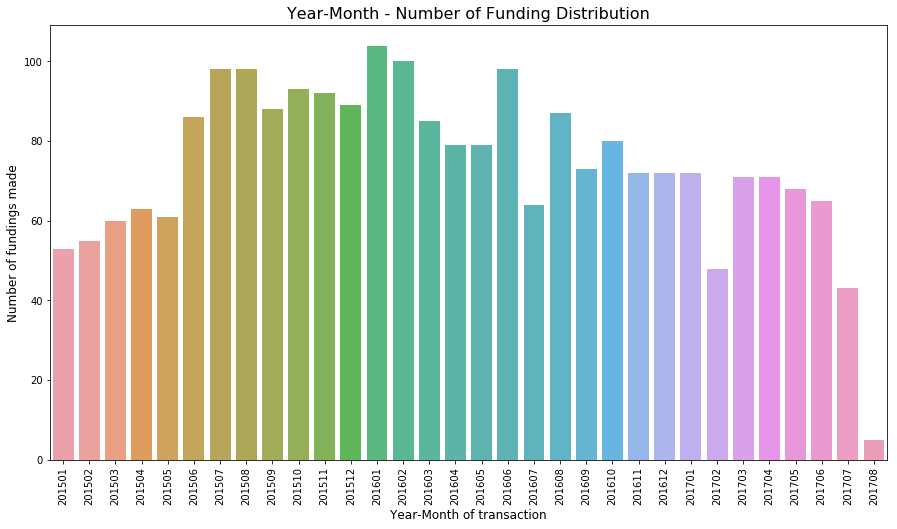

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month - Number of Funding Distribution", fontsize=16)
plt.show()

#### Conclusion from above :    
* July and August of  2015 had the highest investment that year because of the __Digital India Campaign__  
* January 2016 had the higest investment of 2016 and also in the dataset because of the __Startup India Initaitive__
* As expected Demonitization lowered the investement per month from __Nov '16__ to __July '17__
* __Interseting note : __ July '16 saw a decrease of investment and the lowest in the year , may be beacuse of the __Surgical strike__ that happed that month.

#### Year-Month - Amount of Funding distribution

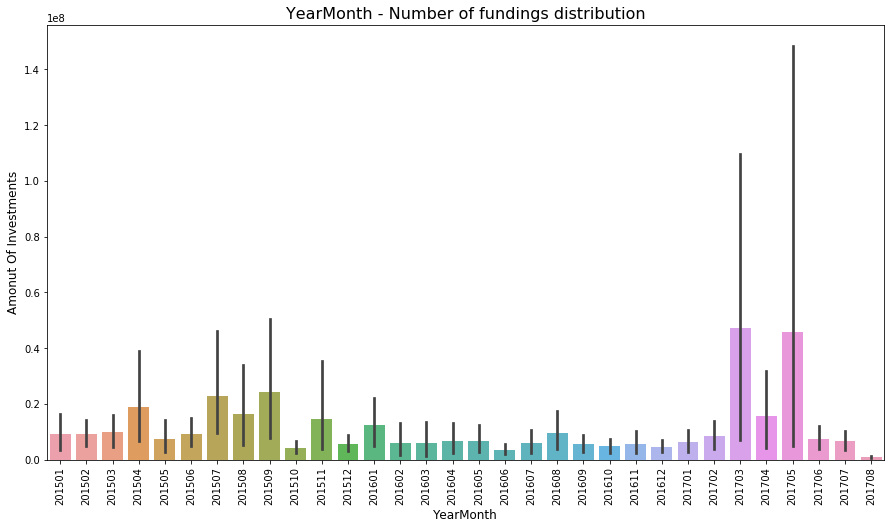

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(fund_data['yearmonth'], fund_data['AmountInUSD'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('YearMonth', fontsize=12)
plt.ylabel('Amonut Of Investments', fontsize=12)
plt.title("YearMonth - Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusion from the above :
* March '17 and May '17 had the maximum investment because  __Flipkart__ and __Paytm__ were funded then.

## Basic analysis of startups

#### Total number of startups

In [24]:
len(fund_data['StartupName'])

2372

#### Unique startups

In [25]:
len(fund_data['StartupName'].unique())

1997

#### Startups that got funding more than 1 times

In [26]:
tot = (fund_data['StartupName'].value_counts()).values
c=0
for i in tot:
    if i > 1:
        c=c+1
print("Startups that got funding more than 1 times = ",c)

Startups that got funding more than 1 times =  280


In [27]:
fund_count  = fund_data['StartupName'].value_counts()
fund_count = fund_count.head(20)
print(fund_count)

Ola Cabs         9
Swiggy           7
UrbanClap        6
Jugnoo           5
Flipkart         5
Medinfi          5
Paytm            5
NoBroker         5
Capital Float    4
Tracxn           4
Byju’s           4
Wooplr           4
HolaChef         4
Moglix           4
Simplilearn      4
YepMe            4
Niki.ai          4
TinyStep         4
Vyomo            4
Voonik           4
Name: StartupName, dtype: int64


#### Plot for top 20 companies that secured 4 or more than 4 fundings

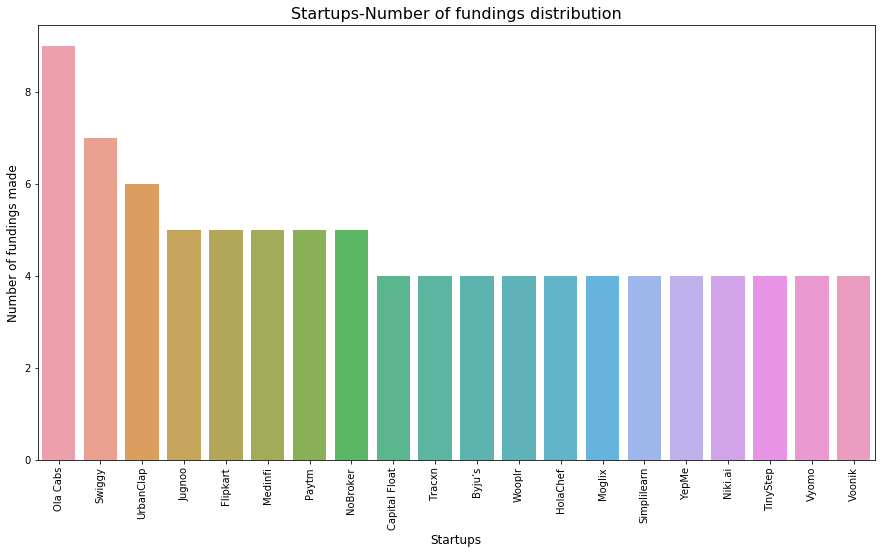

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(fund_count.index, fund_count.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Startups-Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusion from above 
* Most of the companie sthat were funded 4 or more than 4 times were __Consumer Internet__ companies with some exceptions.

## Industry Verticals

#### Unique Industry Verticals

In [29]:
len(fund_data['IndustryVertical'].unique())

741

In [30]:
IndustryVert = fund_data['IndustryVertical'].value_counts().head(20)
print(IndustryVert)

Consumer Internet                772
Technology                       313
eCommerce                        230
Healthcare                        30
Logistics                         24
Education                         20
Food & Beverage                   19
Finance                            9
Others                             6
Online Education Platform          5
Online Food Delivery               5
Real Estate                        4
FMCG                               3
Hyperlocal Handyman Services       3
Big Data & Analytics platform      3
Logistics Tech                     3
Food Delivery Platform             3
Customer Engagement Platform       2
Internet of Things platform        2
Food & Beverages                   2
Name: IndustryVertical, dtype: int64


#### Plot for Industry Vertical

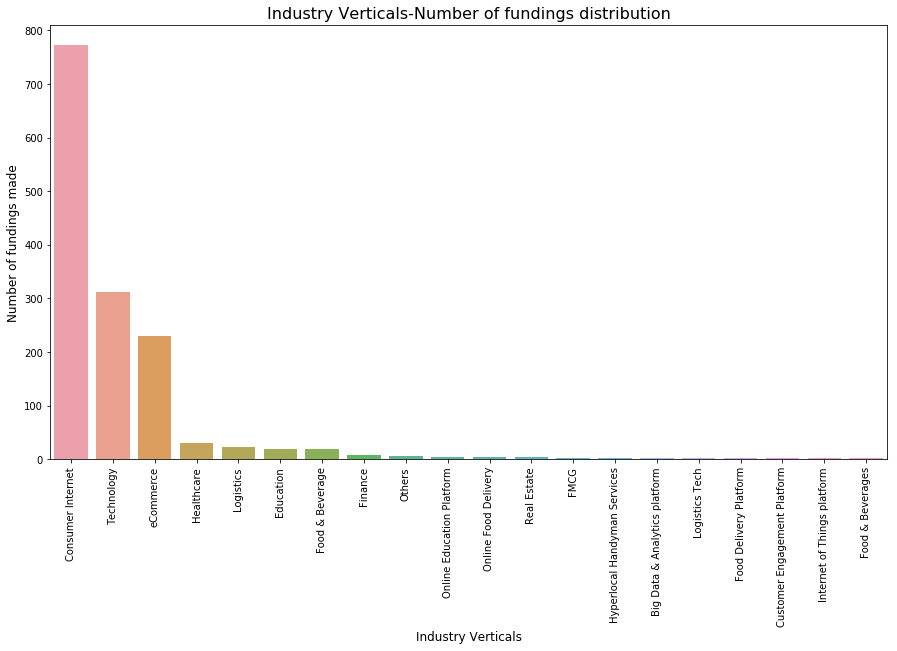

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(IndustryVert.index, IndustryVert.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry Verticals', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry Verticals-Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusion from above
* Consumer Internet startups are the most with 32.5 % in  total.
* Technology with the second most of 13.2%
* And Ecommerce with 9 %

## Subvertical

#### Unique Subverticals

In [32]:
sub_vertical = fund_data['SubVertical']
print("Total number of subverticals : ",len(sub_vertical.unique()))

Total number of subverticals :  1365


#### Top 25 Subverticals

In [33]:
sub_vertical=sub_vertical.value_counts().head(25)
print(sub_vertical)

Online Pharmacy                              9
Food Delivery Platform                       8
Online lending platform                      5
Online Learning Platform                     4
Data Analytics platform                      3
Online Payment Gateway                       3
ECommerce Marketplace                        3
Fitness Mobile App                           3
QSR Chain                                    2
Online marketplace                           2
Cab Aggregation App                          2
Food Ordering Mobile App                     2
On-Demand Washing & Dry Cleaning Services    2
Carpooling Mobile App                        2
Online Gifting platform                      2
Mobile Wallet & ECommerce platform           2
Healthy Food Delivery platform               2
Online Education Portal                      2
Medical Supplies eTailer                     2
Online Furniture Store                       2
Online Women’s Fashion Marketplace           2
Online Real E

#### Plot for Subverticals

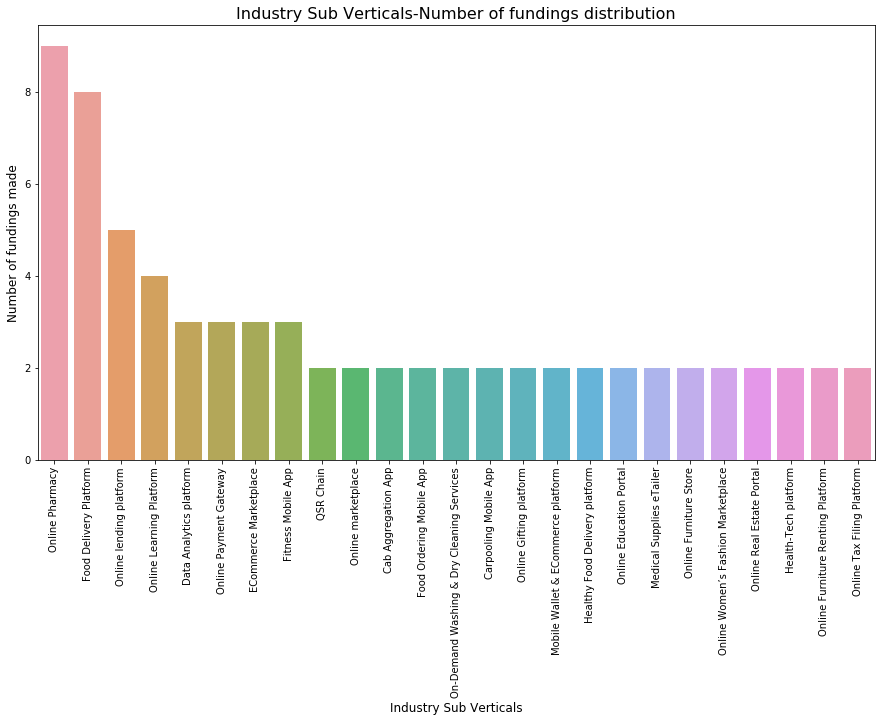

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(sub_vertical.index, sub_vertical.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry Sub Verticals', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry Sub Verticals-Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusions from above
*  Online Pharmacy leads the way with 9 investments

## Investment Types

In [35]:
Investment_Type = fund_data['InvestmentType'].value_counts()
print(Investment_Type)

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64


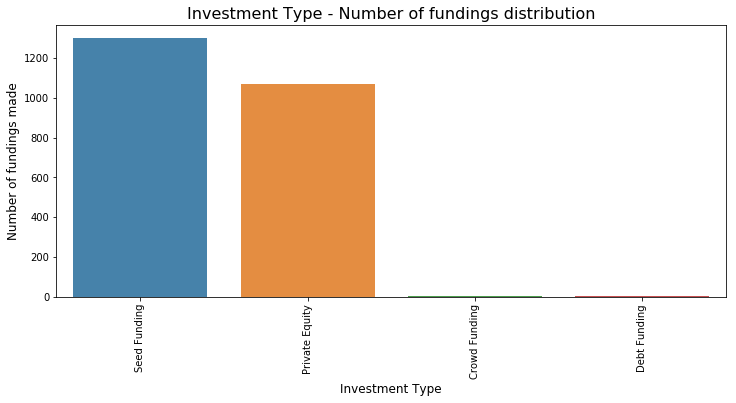

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(Investment_Type.index, Investment_Type.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type - Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusions from above
* Seed Funding and Private funding is the most preferred way of investments by Investors

## Cities

#### Unquie Locations

In [38]:
len(fund_data['CityLocation'].unique())

72

In [39]:

fund_data['CityLocation'].value_counts().head(10)

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

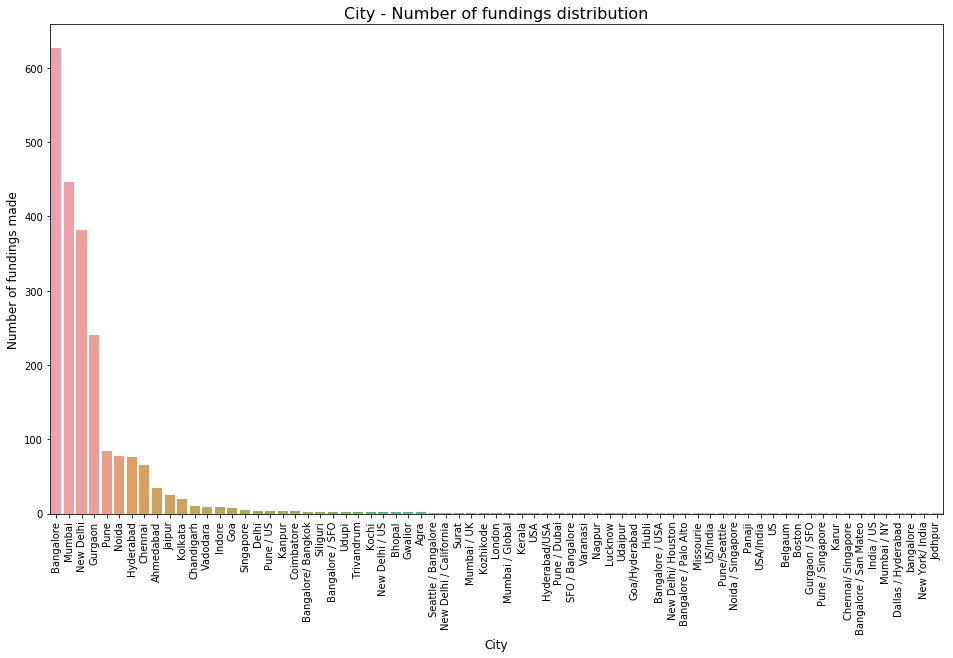

In [40]:
fund_city = fund_data['CityLocation'].value_counts()
plt.figure(figsize=(16,9))
sns.barplot(fund_city.index, fund_city.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City - Number of fundings distribution", fontsize=16)
plt.show()

#### Conclusions from above
* Banglore attracted the most investors with a total of 627 investors. (26.4%)
* Mumbai with 446 investors. (18.8%)
* New Delhi with 381 investors. (16.1%)
* __Intersting note : __  Few II Tier and III cities like Varanasi, Indore, Siliguri, Karur, Nagpur, Belgaum, Kozhikode have also attracted some investors. 

## Investors

### Processing Investors Column

The Investors column need to be pre processed because the cells having more the one investors will also be treated ad a single identity,  therfore they need to be seperated corrected and combine for give the right results

In [41]:
fund_data['InvestorsName'] = fund_data['InvestorsName'].fillna("No info Available")
names = fund_data["InvestorsName"][~pd.isnull(fund_data["InvestorsName"])]
print(names.head())

0                                          Kae Capital
1                           Triton Investment Advisors
2    Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3    Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                       Narottam Thudi, Shireesh Palle
Name: InvestorsName, dtype: object


In [42]:
Investor_list = fund_data['InvestorsName'].str.split(',').apply(pd.Series)

#### Seperating each cell

In [43]:
Investor_list.head()

,0,1,2,3,4,5,6,7,8,9
0,Kae Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Triton Investment Advisors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kashyap Deorah,Anand Sankeshwar,Deepak Jain,Sadashiva NT,Arjun Mehta,Satish Kaul,Anindya Ghose,NaN,NaN,NaN
3,Kunal Shah,LetsVenture,Anupam Mittal,Hetal Sonpal,NaN,NaN,NaN,NaN,NaN,NaN
4,Narottam Thudi,Shireesh Palle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print("Combining all columns into one")
df = Investor_list.stack(dropna=False).reset_index(drop=True).to_frame('newinvest')
print(df.head(10))

Combining all columns into one
     newinvest
0  Kae Capital
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN


In [46]:
InvestorsName = df.dropna(axis=0, how='all')

In [47]:
# Correcting typos
InvestorsName=InvestorsName.replace({" Sequoia Capital":"Sequoia Capital"})
InvestorsName=InvestorsName.replace({"Undisclosed investors":"Undisclosed Investors"})
InvestorsName=InvestorsName.replace({"undisclosed investors":"Undisclosed Investors"})
InvestorsName=InvestorsName.replace({"undisclosed Investors":"Undisclosed Investors"})
InvestorsName=InvestorsName.replace({"Undisclosed":"Undisclosed Investors"})
InvestorsName=InvestorsName.replace({"Undisclosed Investor":"Undisclosed Investors"})
InvestorsName=InvestorsName.replace({" Accel Partners":"Accel Partners"})
InvestorsName=InvestorsName.replace({" Blume Ventures":"Blume Ventures"})
InvestorsName=InvestorsName.replace({" SAIF Partners":"SAIF Partners"})
InvestorsName=InvestorsName.replace({" Kalaari Capital":"Kalaari Capital"})

#### Total investments

In [48]:
len(InvestorsName['newinvest'])

4577

In [49]:
# Now all investors are sperated into individual rows
InvestorsName.head(10)

,newinvest
0,Kae Capital
10,Triton Investment Advisors
20,Kashyap Deorah
21,Anand Sankeshwar
22,Deepak Jain
23,Sadashiva NT
24,Arjun Mehta
25,Satish Kaul
26,Anindya Ghose
30,Kunal Shah


#### Unique Investors

In [50]:
InvestorsName['newinvest'] = InvestorsName['newinvest'].str.strip()
print(len(InvestorsName['newinvest'].unique()))

2544


In [51]:
Investors_top50 = InvestorsName['newinvest'].value_counts().head(50)
# Top 50 investors
print(Investors_top50)

Undisclosed Investors          91
Sequoia Capital                64
Accel Partners                 53
Kalaari Capital                44
SAIF Partners                  41
Indian Angel Network           40
Blume Ventures                 39
                               38
Ratan Tata                     30
Tiger Global                   25
Rajan Anandan                  25
Nexus Venture Partners         24
IDG Ventures                   22
Kae Capital                    22
India Quotient                 21
500 Startups                   20
Matrix Partners                18
Anupam Mittal                  18
LetsVenture                    17
Mumbai Angels                  17
Kunal Shah                     17
Omidyar Network                16
Unitus Seed Fund               16
IDG Ventures India             15
Norwest Venture Partners       15
Group of Angel Investors       15
Sequoia India                  15
ah! Ventures                   14
Tracxn Labs                    14
Tiger Global M

#### Plot for Investors

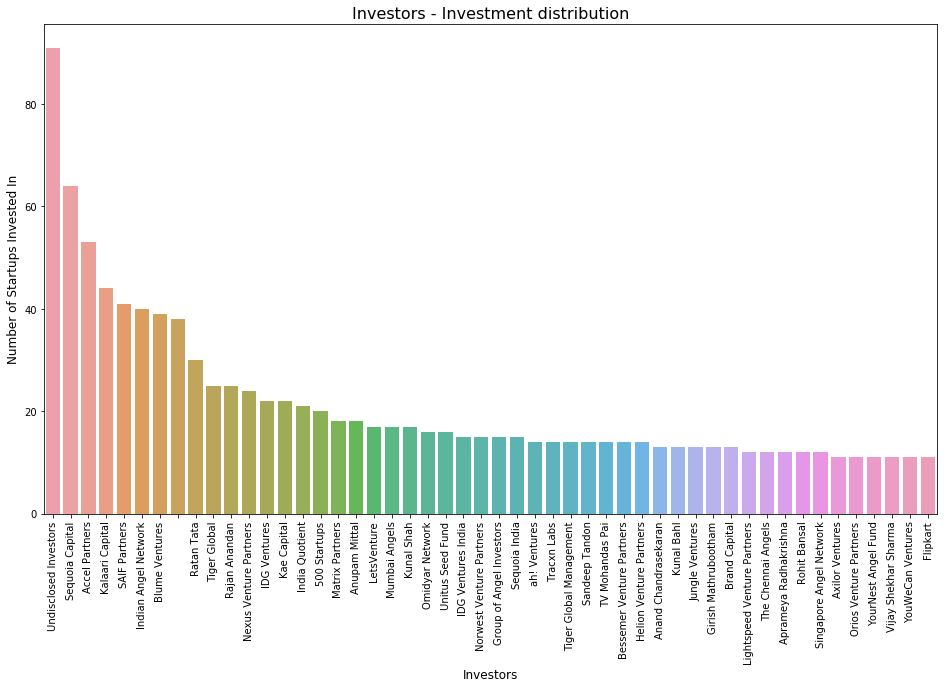

In [52]:
plt.figure(figsize=(16,9))
sns.barplot(Investors_top50.index, Investors_top50.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investors', fontsize=12)
plt.ylabel('Number of Startups Invested In', fontsize=12)
plt.title("Investors - Investment distribution", fontsize=16)
plt.show()

#### Squarify plot for Investors

Text(0.5, 1.0, 'Distribution of Investors and Investments Done')

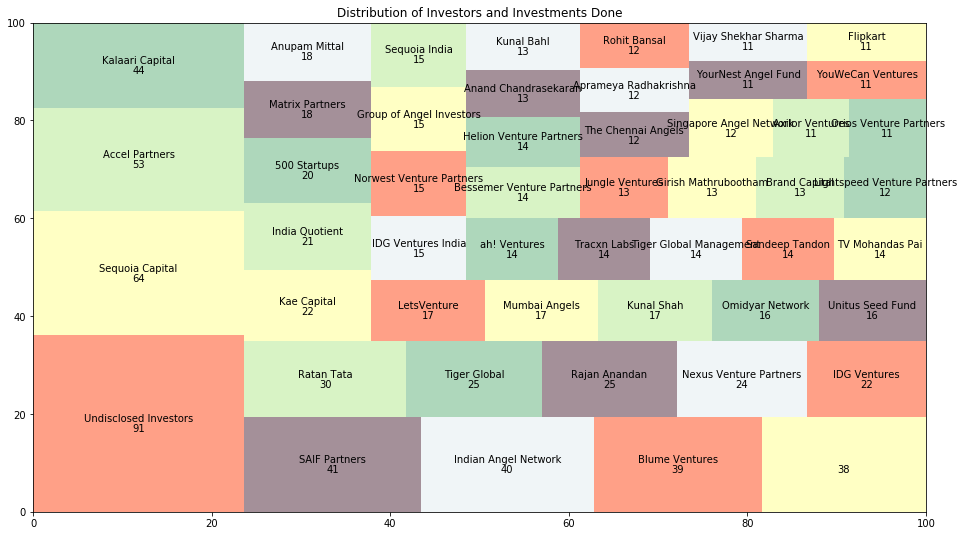

In [53]:
plt.figure(figsize=(16,9))
squarify.plot(sizes=Investors_top50.values,label=Investors_top50.index, value=Investors_top50.values,color=["#FF6138","#FFFF9D","#BEEB9F", "#79BD8F","#684656","#E7EFF3"], alpha=0.6)
plt.title('Distribution of Investors and Investments Done')

#### Conclusions from above
* The plot shows that __Undisclosed Investors__ have done the most investments.
* Followed by Sequoia Capitals with 64 Investments
* Individuals like __Ratan Tata( Former chairman of Tata Sons)__ and __Rajan Anandan( VP,Google SE Asia and India)__ have invested in 30 and 25 companies respectively, most by any individuals

### So this was my analysis on the Indian Startup Funding. More to come.
### Any remarks are welcomed. 
### Please upvote if you like the kernal.


## Thanks You!!